In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [3]:
complete_data = pd.merge(ride_data_df, city_data_df, on = ["city"])
complete_data

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [10]:
# Get the sum of the fares for each city type.
sum_fares_by_type = complete_data.groupby(["type"]).sum()["fare"]
# Get the sum of all the fares.
total_fares = complete_data["fare"].sum()
total_fares


63538.64

In [11]:
type_percents = 100 * sum_fares_by_type / total_fares

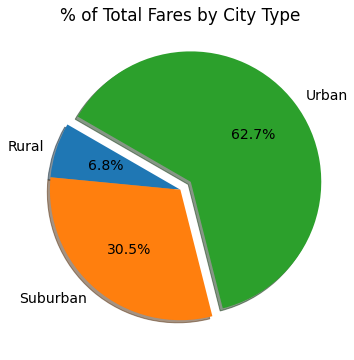

In [23]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, autopct = "%.1f%%",labels=["Rural", "Suburban", "Urban"], explode=[0, 0, 0.1],
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
plt.savefig("Resources/Fig5.png")
plt.show()

In [28]:
percentage_rides = 100 * complete_data.groupby(["type"]).count()["ride_id"] / complete_data["ride_id"].count()
percentage_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

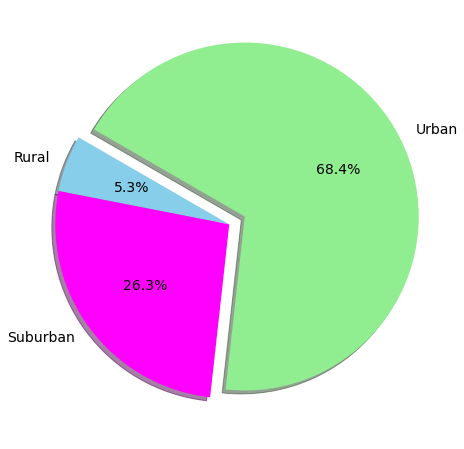

In [47]:
plt.subplots(figsize=(10,8))
plt.pie(percentage_rides, labels=["Rural", "Suburban", "Urban"], autopct = "%.1f%%", colors = ["skyblue", "magenta", "lightgreen"], 
        startangle = 150, shadow = True, explode = [0,0,0.1])
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14
plt.show()